## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Loading Dataset

In [2]:
# loading the dataset to pandas DataFrame
df = pd.read_csv("ip project.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# printing the first 5 rows of the dataframe
df.head()

,Title,Authors,Publication Year,Total Citations,Average per Year,2000,2001,2002,2003,2004,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,RNA-Seq: a revolutionary tool for transcriptomics,"Wang, Zhong; Gerstein, Mark; Snyder, Michael",2009,5424,493.09,0,0,0,0,0,...,0,69,223,341,469,579,699,702,717,685
1,Network biology: Understanding the cell's func...,"Barabasi, AL; Oltvai, ZN",2004,4202,262.63,0,0,0,0,43,...,248,326,285,316,359,313,335,317,329,319
2,The fundamental role of epigenetic events in c...,"Jones, PA; Baylin, SB",2002,3855,214.17,0,0,22,158,190,...,262,263,284,292,270,237,245,205,184,195
3,APPLICATIONS OF NEXT-GENERATION SEQUENCING Seq...,"Metzker, Michael L.",2010,3395,339.50,0,0,0,0,0,...,0,0,148,343,444,408,438,448,433,346
4,Micrornas: Small RNAs with a big role in gene ...,"He, L; Hannon, GJ",2004,3343,208.94,0,0,0,0,10,...,119,144,177,206,265,285,80,280,390,470


In [5]:
# number of rows and columns
df.shape

(3121, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3121 non-null   object 
 1   Authors           3121 non-null   object 
 2   Publication Year  3121 non-null   int64  
 3   Total Citations   3121 non-null   int64  
 4   Average per Year  3121 non-null   float64
 5   2000              3121 non-null   int64  
 6   2001              3121 non-null   int64  
 7   2002              3121 non-null   int64  
 8   2003              3121 non-null   int64  
 9   2004              3121 non-null   int64  
 10  2005              3121 non-null   int64  
 11  2006              3121 non-null   int64  
 12  2007              3121 non-null   int64  
 13  2008              3121 non-null   int64  
 14  2009              3121 non-null   int64  
 15  2010              3121 non-null   int64  
 16  2011              3121 non-null   int64  


### Clean up text


In [7]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [8]:
df["cleaned_title"] = df["Title"].apply(lambda x: clean_text(x))
df.head()

,Title,Authors,Publication Year,Total Citations,Average per Year,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,cleaned_title
0,RNA-Seq: a revolutionary tool for transcriptomics,"Wang, Zhong; Gerstein, Mark; Snyder, Michael",2009,5424,493.09,0,0,0,0,0,...,69,223,341,469,579,699,702,717,685,rna seq a revolutionary tool for transcriptomics
1,Network biology: Understanding the cell's func...,"Barabasi, AL; Oltvai, ZN",2004,4202,262.63,0,0,0,0,43,...,326,285,316,359,313,335,317,329,319,network biology understanding the cells functi...
2,The fundamental role of epigenetic events in c...,"Jones, PA; Baylin, SB",2002,3855,214.17,0,0,22,158,190,...,263,284,292,270,237,245,205,184,195,the fundamental role of epigenetic events in c...
3,APPLICATIONS OF NEXT-GENERATION SEQUENCING Seq...,"Metzker, Michael L.",2010,3395,339.50,0,0,0,0,0,...,0,148,343,444,408,438,448,433,346,applications of next generation sequencing seq...
4,Micrornas: Small RNAs with a big role in gene ...,"He, L; Hannon, GJ",2004,3343,208.94,0,0,0,0,10,...,144,177,206,265,285,80,280,390,470,micrornas small rnas with a big role in gene r...


## Determine most-frequent words, remove stop words

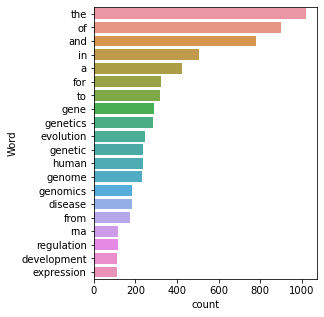

In [9]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(4,5)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(df['cleaned_title'],20)

In [10]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['finalcleaned_title'] = df['cleaned_title'].apply(lambda x: remove_stopwords(x))

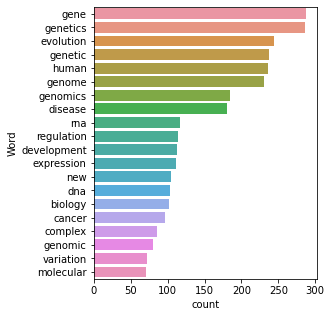

In [11]:
freq_words(df["finalcleaned_title"],20)

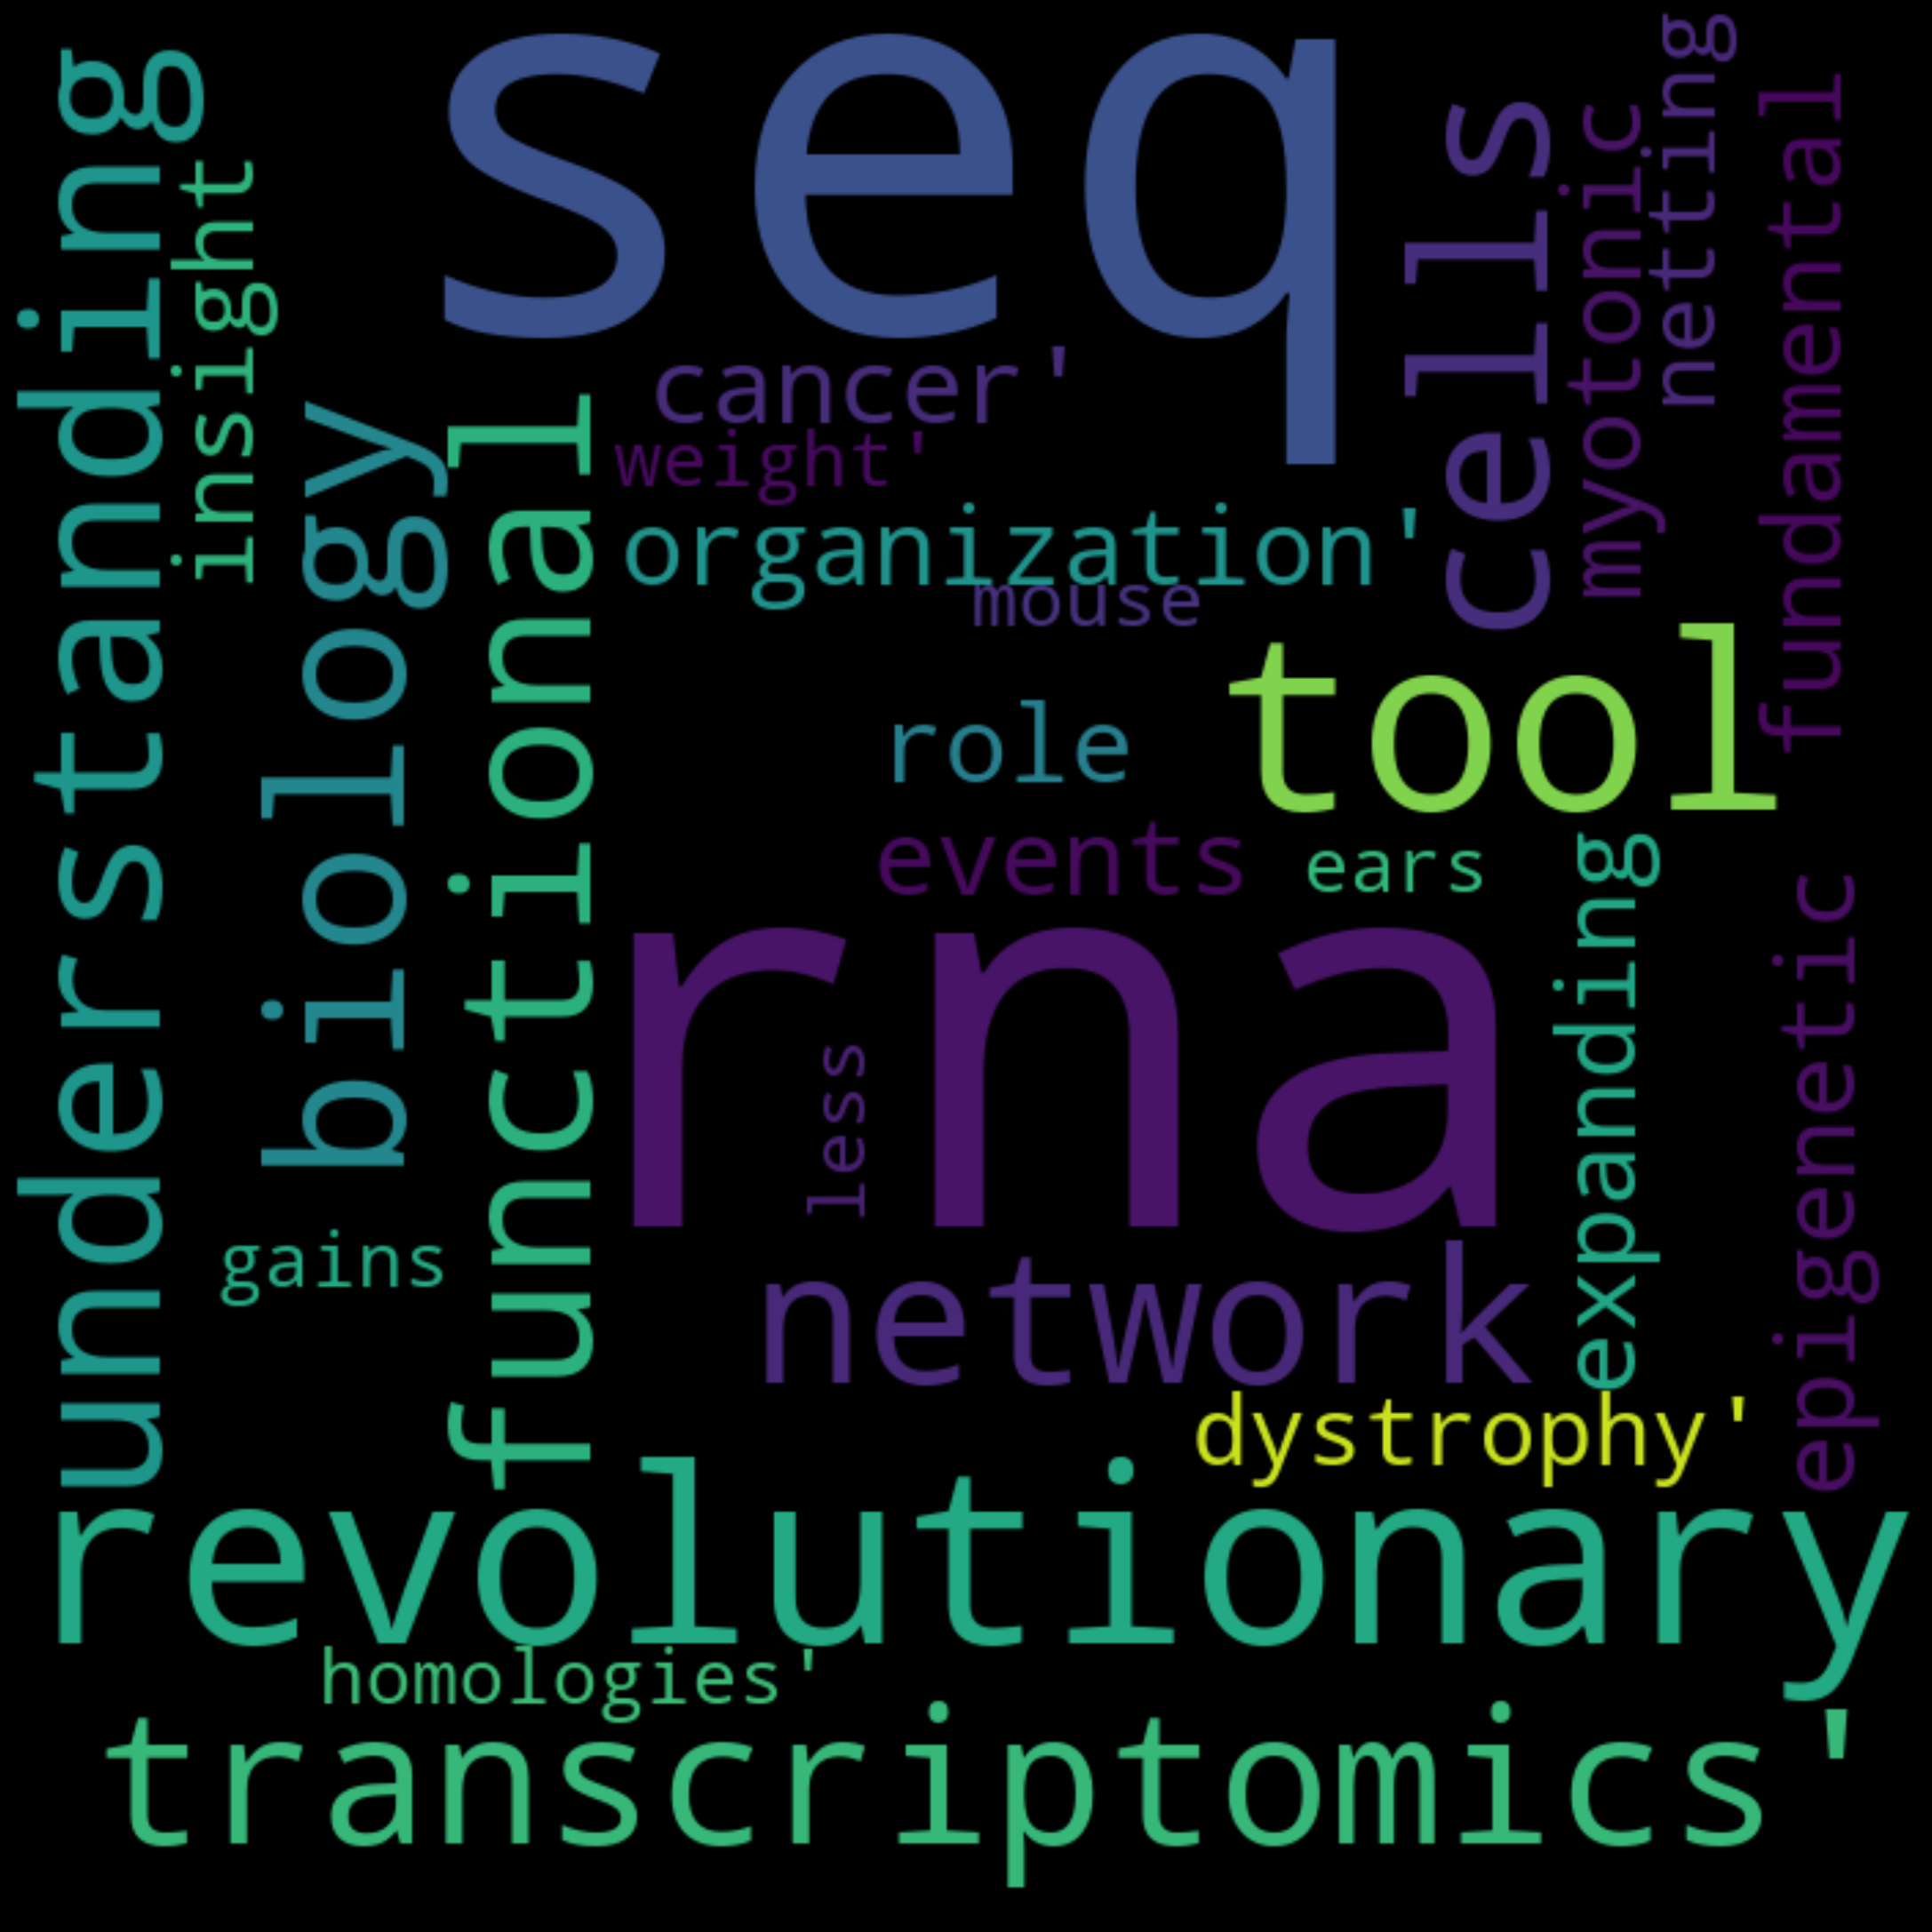

In [12]:
from wordcloud import WordCloud, STOPWORDS
text = df.cleaned_title.values
wordcloud = WordCloud(
    width = 700,
    height = 700,
    max_font_size = 200,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:
#traindf = df[["finalcleaned_title", "Average per Year", "2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","Total Citations"]]

traindf = df[["finalcleaned_title", "Average per Year", "Total Citations"]]
traindf.head()

,finalcleaned_title,Average per Year,Total Citations
0,rna seq revolutionary tool transcriptomics,493.09,5424
1,network biology understanding cells functional...,262.63,4202
2,fundamental role epigenetic events cancer,214.17,3855
3,applications next generation sequencing sequen...,339.50,3395
4,micrornas small rnas big role gene regulation,208.94,3343


In [14]:
traindf["Total Citations"].describe()

count    3121.000000
mean      115.244473
std       284.517875
min         0.000000
25%         0.000000
50%         2.000000
75%       130.000000
max      5424.000000
Name: Total Citations, dtype: float64

In [15]:
traindf["Total Citations"].mean()
traindf["Category"] = np.where(traindf["Total Citations"]>traindf["Total Citations"].median(), "Top_half", "Bottom_half")
traindf.head()


<ipython-input-15-6de7f767916d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf["Category"] = np.where(traindf["Total Citations"]>traindf["Total Citations"].median(), "Top_half", "Bottom_half")


,finalcleaned_title,Average per Year,Total Citations,Category
0,rna seq revolutionary tool transcriptomics,493.09,5424,Top_half
1,network biology understanding cells functional...,262.63,4202,Top_half
2,fundamental role epigenetic events cancer,214.17,3855,Top_half
3,applications next generation sequencing sequen...,339.50,3395,Top_half
4,micrornas small rnas big role gene regulation,208.94,3343,Top_half


In [16]:
traindf.groupby(["Category"]).size()

Category
Bottom_half    1636
Top_half       1485
dtype: int64

### TF-IDF Vectorizer vs. Count Vectorizer
### TF-IDF: weights down common words, gives more importance to rare words
### Count Vectorizer: convert a collection of text to a matrix of the counts of occurences of each word in the document

In [17]:
#set up X and y
X_train = traindf['finalcleaned_title']
y_train = traindf['Category']

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=1)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initalise the vectoriser 
tvec = TfidfVectorizer()
# fit the training data on the model
tvec.fit(X_train)

#transform training data into sparse matrix
X_train_tvec = tvec.transform(X_train)

# cross val score/ predict
tvec_score = cross_val_score(lr, X_train_tvec, y_train, cv=3)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
# initalise the vectoriser 
cvec = CountVectorizer()
# fit the training data on the model
cvec.fit(X_train)

#transform training data into sparse matrix
X_train_cvec = cvec.transform(X_train)

# cross val score/ predict
cvec_score = cross_val_score(lr, X_train_cvec, y_train, cv=3 )
X_train_cvec

<3121x3920 sparse matrix of type '<class 'numpy.int64'>'
	with 16165 stored elements in Compressed Sparse Row format>

In [20]:
df_cvec = pd.DataFrame(X_train_cvec.todense(),columns=cvec.get_feature_names())
print('TF-IDF Vectorizer Score:', tvec_score.mean())
print('Count Vectorizer Score:', cvec_score.mean())
acc_list = []
acc_list.append(cvec_score.mean())
acc_list.append(tvec_score.mean())

# DataFrame Accuracy 
acc_df = pd.DataFrame()
acc_df['params']=['Count', 'TF-IDF']
acc_df['scores']= acc_list
acc_df

TF-IDF Vectorizer Score: 0.7138774969826843
Count Vectorizer Score: 0.7225291879110323


,params,scores
0,Count,0.722529
1,TF-IDF,0.713877


## Logistic Regression with TF-IDF

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000)
xtrain, xval, ytrain, yval = train_test_split(traindf['finalcleaned_title'], traindf['Category'], test_size=0.2, random_state=9)

# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(xtrain_tfidf, ytrain)
print(f"Training Data Score: {classifier.score(xtrain_tfidf, ytrain)}")
print(f"Testing Data Score: {classifier.score(xval_tfidf, yval)}")

Training Data Score: 0.8441506410256411
Testing Data Score: 0.7472


In [22]:
# make predictions for validation set
predictions = classifier.predict(xval_tfidf)

pred = pd.DataFrame()
pred["Predictions"] = predictions[:10]
pred["Actual"] = yval[:10].tolist()
pred

#print(f"Predictions: {predictions[:10]}")
#print(f"Actual labels: {yval[:10].tolist()}")

,Predictions,Actual
0,Top_half,Top_half
1,Top_half,Top_half
2,Bottom_half,Bottom_half
3,Top_half,Bottom_half
4,Bottom_half,Bottom_half
5,Bottom_half,Bottom_half
6,Bottom_half,Bottom_half
7,Top_half,Top_half
8,Top_half,Top_half
9,Top_half,Top_half
